<a href="https://colab.research.google.com/github/Vishall1221/CreditCardClassification_KNN/blob/main/CreditCardClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation and preprocessing

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Load data
df = pd.read_csv("Score.csv")

In [19]:
df.head()

,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_Mix,...,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month
0,3,7,4,26.822620,265,No,80.415295,312.494089,Good,Good,...,23,19114.12,3,4,3,4,1824.843333,11.27,809.98,49.574949
1,3,7,4,31.944960,265,No,118.280222,284.629163,Good,Good,...,23,19114.12,3,4,3,4,1824.843333,11.27,809.98,49.574949
2,3,7,4,28.609352,267,No,81.699521,331.209863,Good,Good,...,23,19114.12,3,4,3,4,1824.843333,11.27,809.98,49.574949
3,5,4,4,31.377862,268,No,199.458074,223.451310,Good,Good,...,23,19114.12,3,4,3,4,1824.843333,11.27,809.98,49.574949
4,6,4,4,24.797347,269,No,41.420153,341.489231,Good,Good,...,23,19114.12,3,4,3,4,1824.843333,11.27,809.98,49.574949


In [20]:
df.describe()

,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Amount_invested_monthly,Monthly_Balance,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month
count,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000,99960.000000
mean,21.095718,13.336345,5.774570,32.284544,221.122819,193.665219,403.445100,33.269228,50498.704153,5.368868,5.532853,14.535174,3.533974,4196.814288,10.396953,1426.514966,105.565802
std,14.827414,6.269964,3.862224,5.116888,99.696084,194.782737,214.387092,10.762371,38294.243161,2.591668,2.067698,8.741047,2.446156,3186.518163,6.510846,1155.252504,125.820983
min,0.000000,0.000000,0.000000,20.000000,1.000000,0.000000,0.007760,14.000000,7005.930000,0.000000,0.000000,1.000000,0.000000,303.645417,0.500000,0.230000,0.000000
25%,10.000000,9.000000,3.000000,28.052051,144.000000,73.708522,270.317007,24.000000,19338.480000,3.000000,4.000000,7.000000,2.000000,1626.594167,5.500000,566.080000,29.054273
50%,18.000000,14.000000,5.000000,32.305470,219.000000,129.342067,337.237873,33.000000,36996.830000,5.000000,5.000000,13.000000,3.000000,3091.386667,9.340000,1166.470000,66.058063
75%,28.000000,18.000000,8.000000,36.496305,302.000000,234.323706,471.904834,42.000000,71681.400000,7.000000,7.000000,20.000000,5.000000,5957.715000,14.680000,1948.200000,145.584994
max,67.000000,28.000000,29.000000,50.000000,404.000000,1977.326102,1602.040519,56.000000,179987.280000,10.000000,11.000000,34.000000,9.000000,15204.633330,29.980000,4998.070000,1779.103254


In [21]:
df.shape

(99960, 21)

In [22]:
df.dtypes

,0
Delay_from_due_date,int64
Num_of_Delayed_Payment,int64
Num_Credit_Inquiries,int64
Credit_Utilization_Ratio,float64
Credit_History_Age,int64
Payment_of_Min_Amount,object
Amount_invested_monthly,float64
Monthly_Balance,float64
Credit_Score,object
Credit_Mix,object


In [23]:
df['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [24]:
df.isna().sum()

,0
Delay_from_due_date,0
Num_of_Delayed_Payment,0
Num_Credit_Inquiries,0
Credit_Utilization_Ratio,0
Credit_History_Age,0
Payment_of_Min_Amount,0
Amount_invested_monthly,0
Monthly_Balance,0
Credit_Score,0
Credit_Mix,0


In [25]:
# Select relevant features
df = df[[
    "Credit_Utilization_Ratio", "Credit_History_Age", "Amount_invested_monthly",
    "Monthly_Balance", "Annual_Income", "Monthly_Inhand_Salary",
    "Changed_Credit_Limit", "Outstanding_Debt", "Total_EMI_per_month", "Credit_Score"
]]

# EDA

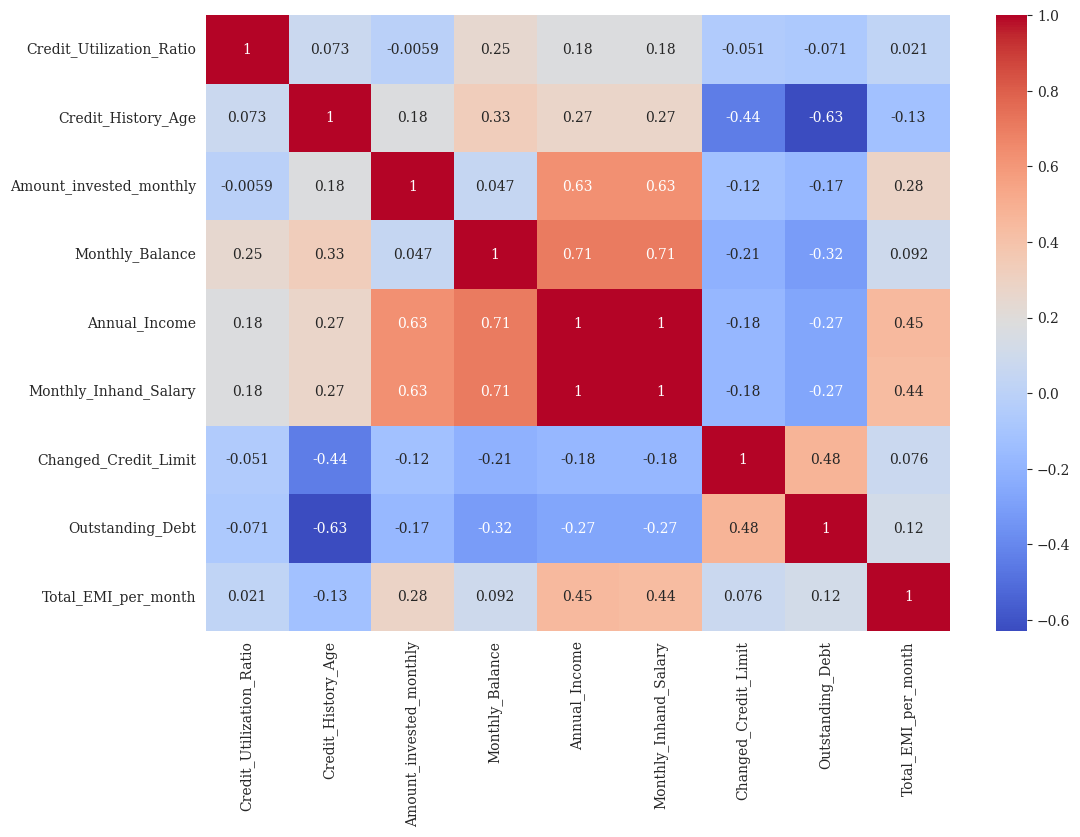

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


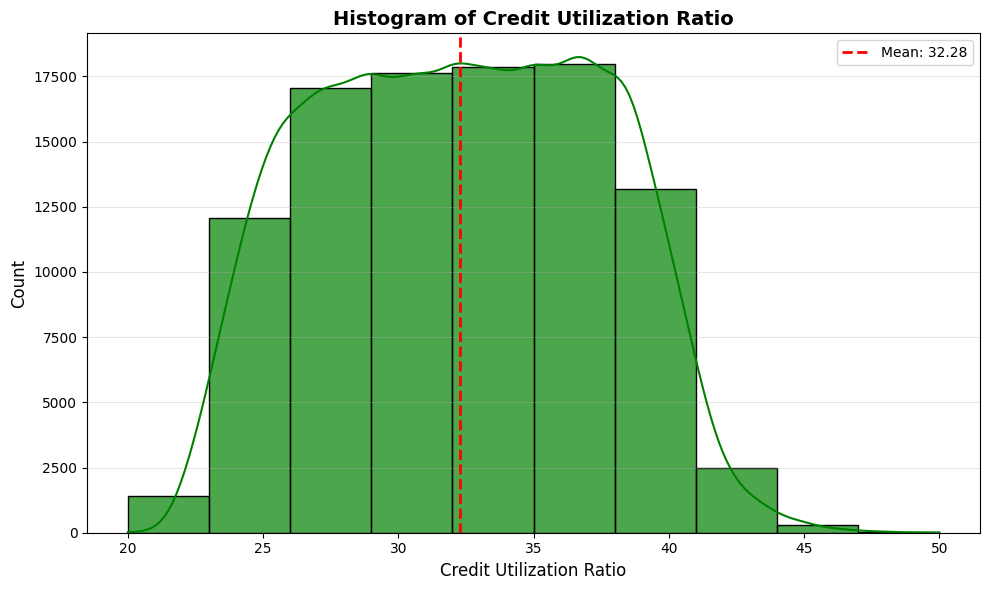

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Create a histogram with color
sns.histplot(data=df, x='Credit_Utilization_Ratio', bins=10, kde=True,
             color='green', edgecolor='black', alpha=0.7)

# Add a vertical line at the mean
plt.axvline(x=df['Credit_Utilization_Ratio'].mean(), color='red',
            linestyle='--', linewidth=2, label=f'Mean: {df["Credit_Utilization_Ratio"].mean():.2f}')

plt.title('Histogram of Credit Utilization Ratio', fontsize=14, fontweight='bold')
plt.xlabel('Credit Utilization Ratio', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

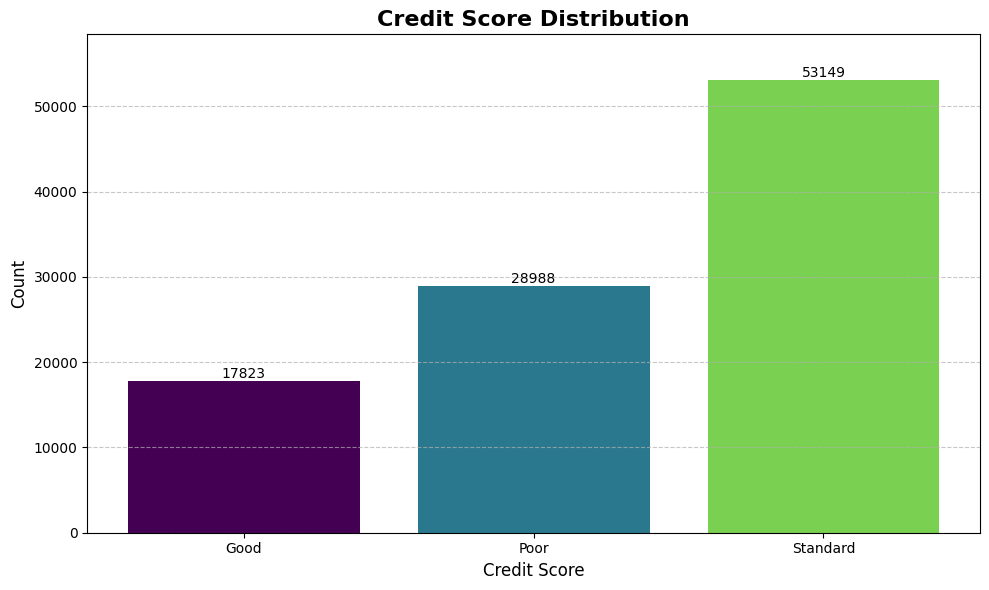

In [35]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))

# Get the value counts for each credit score category
credit_score_counts = df['Credit_Score'].value_counts().sort_index()

# Define a colormap for visual appeal
colors = plt.cm.viridis(np.linspace(0, 0.8, len(credit_score_counts)))

# Create the bar chart with colors
bars = plt.bar(credit_score_counts.index, credit_score_counts.values, color=colors)

# Add data labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{height}', ha='center', va='bottom')

# Enhance the visualization
plt.title('Credit Score Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Credit Score', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45 if len(credit_score_counts) > 5 else 0)

# Add a bit of padding to the y-axis to accommodate the data labels
plt.ylim(0, max(credit_score_counts.values) * 1.1)

plt.tight_layout()
plt.show()

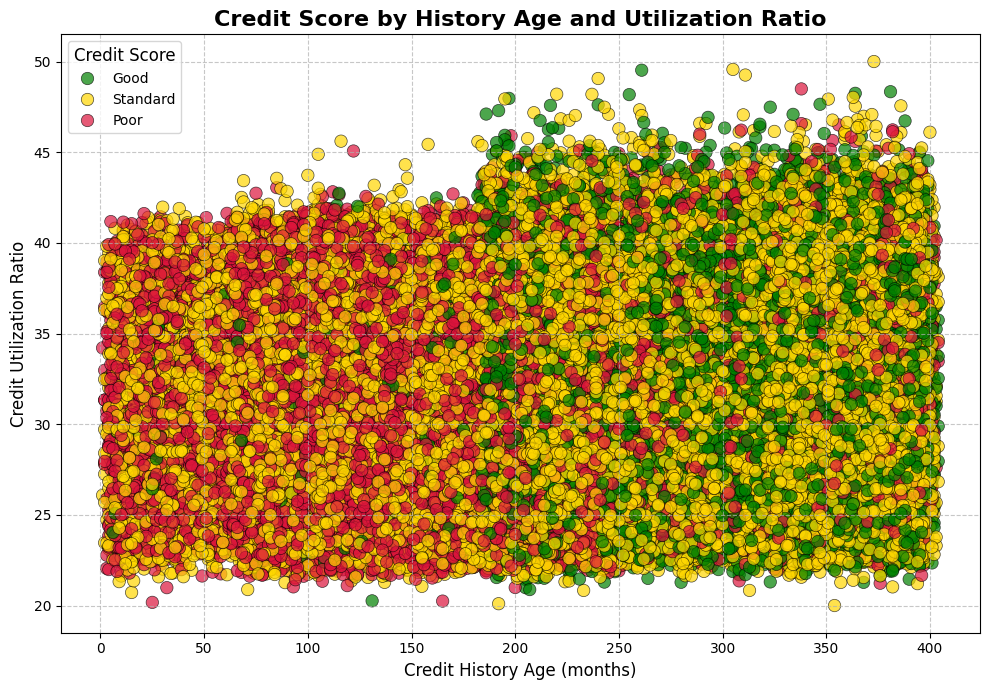

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(10, 7))

# Create scatter plot directly using Credit_Score as the hue
# This is more efficient than creating a separate color column
sns.scatterplot(
    data=df,
    x='Credit_History_Age',
    y='Credit_Utilization_Ratio',
    hue='Credit_Score',
    palette={'Good': 'green', 'Standard': 'gold', 'Poor': 'crimson'},
    s=80,  # Slightly larger point size
    alpha=0.7,  # Some transparency to handle overlapping
    edgecolor='black',  # Black outline makes points stand out
    linewidth=0.5
)

# Add a descriptive title and axis labels
plt.title('Credit Score by History Age and Utilization Ratio', fontsize=16, fontweight='bold')
plt.xlabel('Credit History Age (months)', fontsize=12)
plt.ylabel('Credit Utilization Ratio', fontsize=12)

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Improve legend
plt.legend(title='Credit Score', title_fontsize=12)

# Adjust layout
plt.tight_layout()

plt.show()

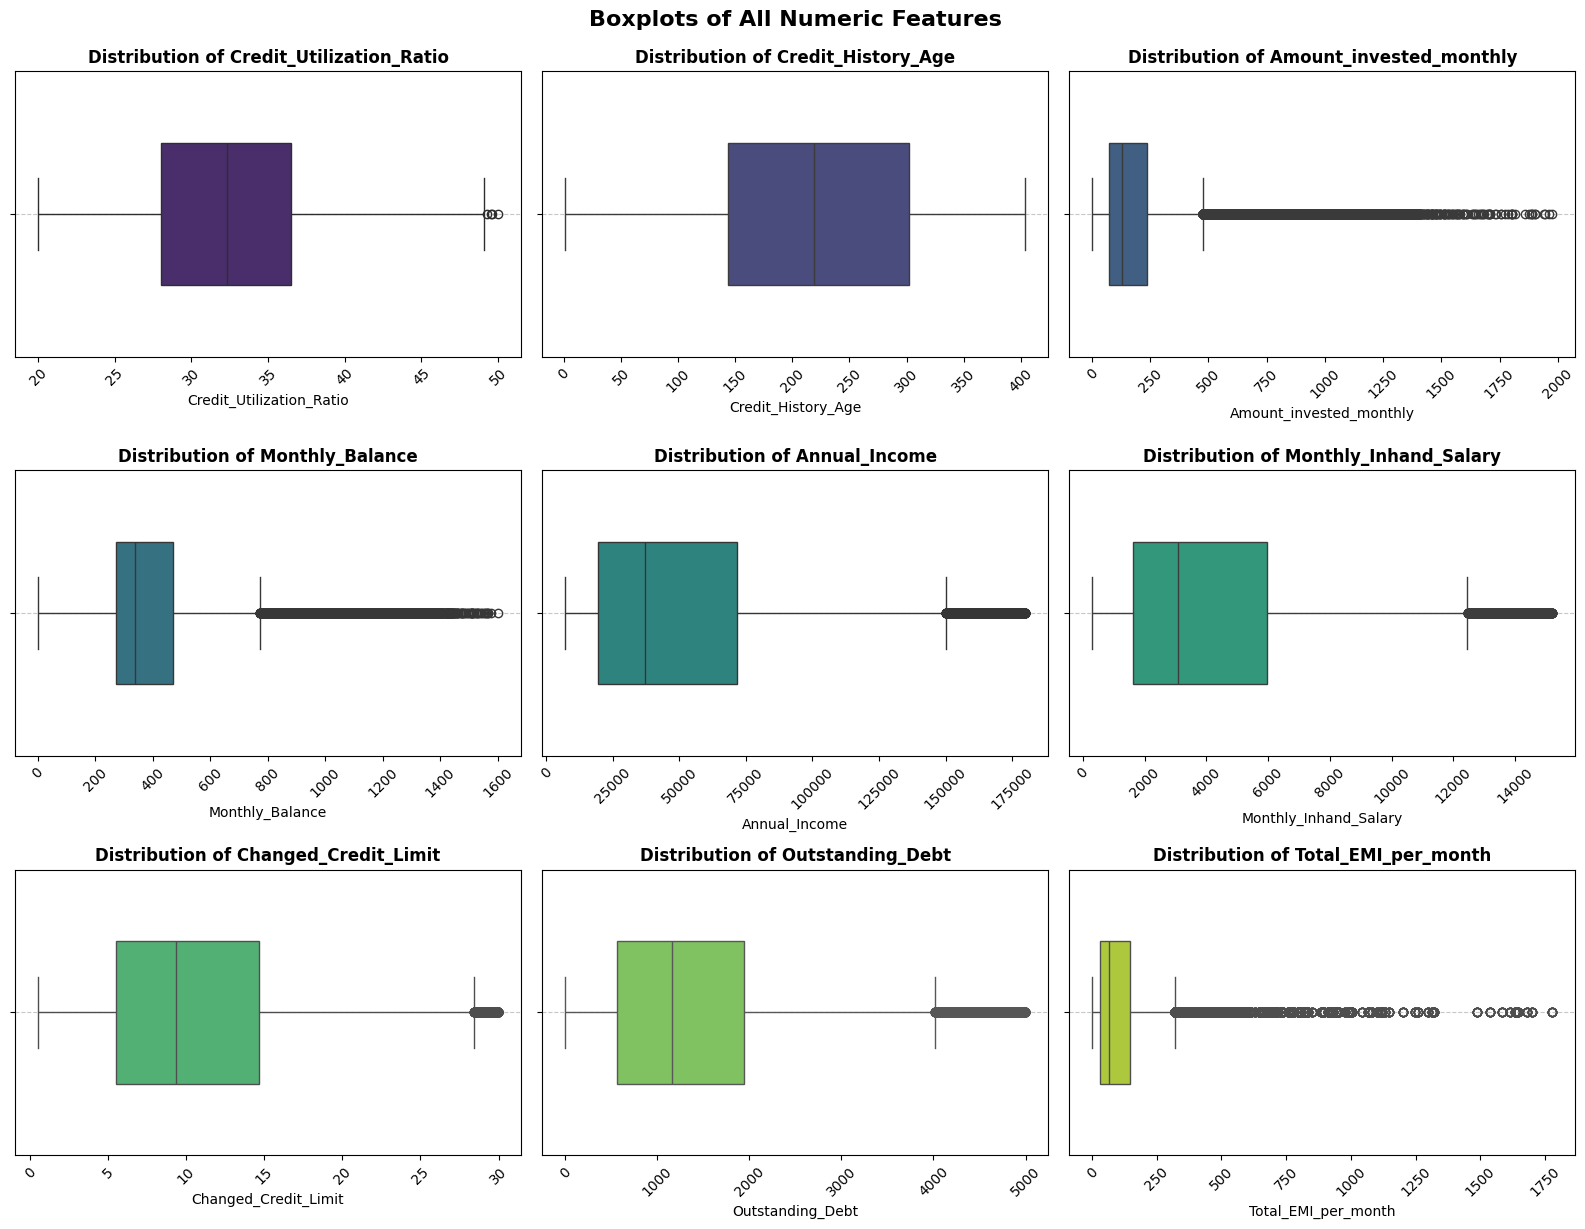

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Get numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate number of rows and columns for subplots
n_cols = 3
n_rows = int(np.ceil(len(numeric_columns) / n_cols))

# Create figure with appropriate size
plt.figure(figsize=(16, n_rows * 4))

# Set a color palette
colors = sns.color_palette("viridis", len(numeric_columns))

# Plot boxplots for all numeric features
for i, (col, color) in enumerate(zip(numeric_columns, colors), 1):
    plt.subplot(n_rows, n_cols, i)

    # Create boxplot with custom styling
    box = sns.boxplot(data=df, x=col, color=color, width=0.5)

    # Styling
    plt.title(f'Distribution of {col}', fontweight='bold')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Rotate x-ticks if values are categorical or many
    if len(df[col].unique()) > 5:
        plt.xticks(rotation=45)

# Improve overall layout
plt.tight_layout()
plt.suptitle('Boxplots of All Numeric Features', fontsize=16, y=1.02, fontweight='bold')
plt.show()

In [41]:
from sklearn.preprocessing import LabelEncoder

# Encode the target
le = LabelEncoder()
y = le.fit_transform(df["Credit_Score"])

# Separate features
X = df.drop("Credit_Score", axis=1)


In [42]:
import numpy as np

log_cols = [
    'Amount_invested_monthly', 'Monthly_Balance',
    'Annual_Income', 'Monthly_Inhand_Salary', 'Outstanding_Debt'
]

# Replace 0s with NaN to avoid log(0), then apply log
for col in log_cols:
    X[col] = np.log(X[col].replace(0, np.nan))

# Remove any rows with inf/nan after log
X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna()
y = y[X.index]  # Keep y in sync


In [43]:
def remove_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    return data[(data[col] >= Q1 - 1.5 * IQR) & (data[col] <= Q3 + 1.5 * IQR)]

outlier_cols = ['Credit_History_Age', 'Monthly_Balance', 'Outstanding_Debt', 'Total_EMI_per_month']

# Remove outliers for each column
for col in outlier_cols:
    mask = X.index.isin(remove_outliers_iqr(X, col).index)
    X = X[mask]
    y = y[mask]  # Sync y again


In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [45]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X_scaled, y)

# Get selected column names
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features.tolist())


Selected Features: ['Credit_History_Age', 'Monthly_Balance', 'Annual_Income', 'Changed_Credit_Limit', 'Outstanding_Debt']


**SMOTE Oversampling and Train-Test Split**

In [46]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Subset X with only the selected columns
X_selected_df = X[selected_features]

# Scale again before SMOTE (if needed)
X_scaled_selected = scaler.fit_transform(X_selected_df)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled_selected, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)


# Model Building : KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score

# Train KNN model with default parameters
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predict on test data
y_pred = knn.predict(X_test)

# Print classification report
print("KNN Classification Report (No Hyperparameter Tuning):")
print(accuracy_score(y_test, y_pred))


KNN Classification Report (No Hyperparameter Tuning):
0.7889980074010817


**Hyper parameter tuning using Grid searchCV**

In [50]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 = Manhattan distance, 2 = Euclidean
}

# Initialize GridSearchCV with KNN
grid_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit on training data
grid_knn.fit(X_train, y_train)

# Predict on test data
y_pred = grid_knn.predict(X_test)

print("Accuracy Score (After Tuning):")
print(accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Accuracy Score (After Tuning):
0.849025049814973


In [51]:
print("Best KNN Parameters:", grid_knn.best_params_)

Best KNN Parameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


# Model Evaluation

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision, Recall, F1 Score (macro to handle multi-class fairly)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.849025049814973
Precision: 0.8481945002840653
Recall: 0.8490250498149731
F1 Score: 0.8454459709893573

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      9368
           1       0.85      0.90      0.87      9368
           2       0.84      0.70      0.76      9368

    accuracy                           0.85     28104
   macro avg       0.85      0.85      0.85     28104
weighted avg       0.85      0.85      0.85     28104



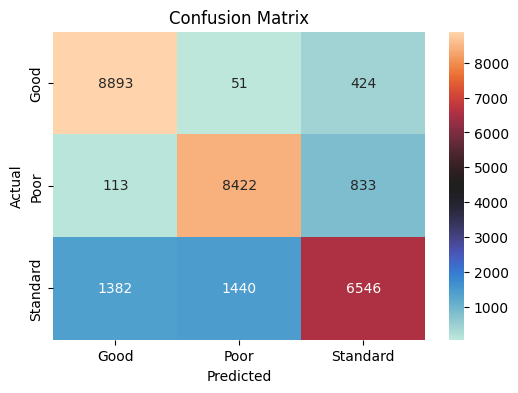

In [54]:
# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='icefire', xticklabels=target_encoder.encoder.classes_, yticklabels=target_encoder.encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# **Interpretation of Results :**

**Analysis of the Confusion Matrix:**

Class: Good (Actual)

Correctly predicted as Good: 8893

Misclassified as Poor: 51

Misclassified as Standard: 424

Class: Poor (Actual)

Correctly predicted as Poor: 8422

Misclassified as Good: 113

Misclassified as Standard: 833

Class: Standard (Actual)

Correctly predicted as Standard: 6546

Misclassified as Good: 1382

Misclassified as Poor: 1440




**Potential Reasons for Misclassifications:**

Class overlap: "Standard" and "Poor" might have overlapping financial traits.

Imbalanced or noisy data: Despite SMOTE, real-world variance can affect minority class learning.

Selected features: Only 5 were used — maybe some relevant indicators were dropped in SelectKBest.

KNN sensitivity: KNN can be sensitive to local patterns and noise, especially for minority classes.



# Visualizations

**Decision Boundaries with PCA**

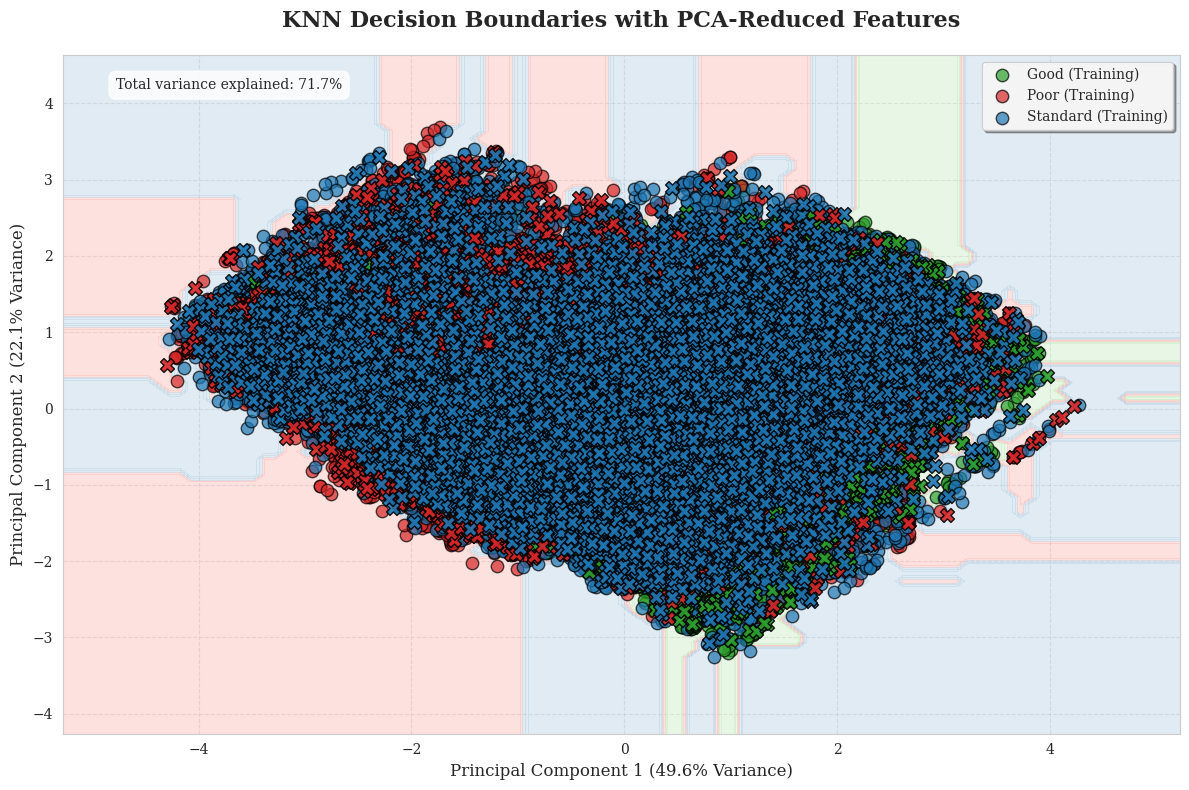

In [59]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
import matplotlib.patheffects as PathEffects
import seaborn as sns

# Set the style
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'serif'

# Reduce features to 2D using PCA
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# Re-train KNN on 2D data
knn_2d = KNeighborsClassifier(**grid_knn.best_params_)
knn_2d.fit(X_train_2d, y_train)

# Define the mapping between numeric labels and words
# Make sure this matches your actual label encoding
label_map = {0: 'Good', 1: 'Poor', 2: 'Standard'}
reverse_map = {'Good': 0, 'Poor': 1, 'Standard': 2}  # For converting words back to numbers

# Create color maps - professional palette
colors = ['#2ca02c', '#d62728', '#1f77b4']  # green, red, blue
cmap_light = ListedColormap(['#c7e9c0', '#fbb4ae', '#b3cde3'])  # lighter versions

# Plot decision boundaries
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Keep Z as numeric for contourf
Z_numeric = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z_numeric = Z_numeric.reshape(xx.shape)

# Create figure
plt.figure(figsize=(12, 8))

# Create contour plot with decision boundaries using numeric Z
plt.contourf(xx, yy, Z_numeric, alpha=0.4, cmap=cmap_light)

# Get word labels for display
y_train_words = np.array([label_map.get(label, str(label)) for label in y_train])
y_test_words = np.array([label_map.get(label, str(label)) for label in y_test])
unique_labels = [label_map.get(i, str(i)) for i in sorted(np.unique(y_train))]

# Plot both training and test points
markers = ['o', 'X']
datasets = [(X_train_2d, y_train_words, 'Training'), (X_test_2d, y_test_words, 'Test')]

for data, labels, set_name in datasets:
    for i, label in enumerate(unique_labels):
        idx = np.where(labels == label)
        marker = markers[0] if set_name == 'Training' else markers[1]
        plt.scatter(data[idx, 0], data[idx, 1],
                  c=colors[i],
                  label=f"{label} ({set_name})" if set_name == 'Training' else None,
                  marker=marker,
                  edgecolor='k',
                  s=80 if set_name == 'Training' else 100,
                  alpha=0.7 if set_name == 'Training' else 0.9)

# Calculate explained variance
explained_variance = pca.explained_variance_ratio_ * 100

# Add annotations
plt.title("KNN Decision Boundaries with PCA-Reduced Features", fontsize=16, fontweight='bold', pad=20)
plt.xlabel(f"Principal Component 1 ({explained_variance[0]:.1f}% Variance)", fontsize=12)
plt.ylabel(f"Principal Component 2 ({explained_variance[1]:.1f}% Variance)", fontsize=12)

# Add a legend with a shadow effect
legend = plt.legend(loc="best", fontsize=10, frameon=True, fancybox=True, framealpha=0.9, shadow=True)
frame = legend.get_frame()
frame.set_facecolor('white')

# Add grid but make it subtle
plt.grid(True, linestyle='--', alpha=0.6)

# Add PCA info text
pca_txt = plt.text(x_min + 0.5, y_max - 0.5,
                  f"Total variance explained: {sum(explained_variance):.1f}%",
                  fontsize=10,
                  bbox=dict(boxstyle="round,pad=0.5", facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

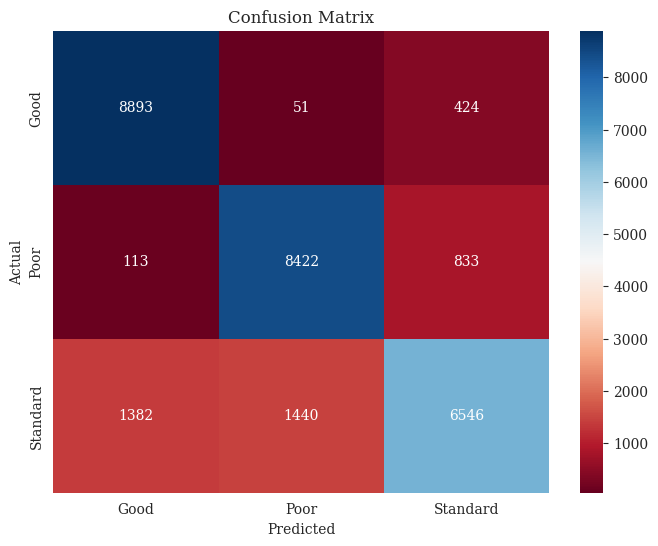

In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Compute and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='RdBu', xticklabels=target_encoder.encoder.classes_, yticklabels=target_encoder.encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Brief Report


**1. Chosen Algorithm and Rationale**

Algorithm Used: K-Nearest Neighbors (KNN)

Reason for Choice:

KNN performed the best among the given options: Decision Trees, Naive Bayes, and KNN.

KNN is a non-parametric, instance-based learning algorithm that performs well on normalized and balanced datasets.

After preprocessing, KNN gave consistently high accuracy, especially after feature selection and tuning.

**2. Model Performance Metrics**

Accuracy: 84.90%

Precision: 84.81%

Recall: 84.90%

F1 Score: 84.54%

The model shows balanced performance across all metrics, indicating good generalization on unseen data.

**3. Insights from Confusion Matrix**

Class 0 (Good) was classified very accurately, with high precision and recall.

Class 1 (Standard) also had strong performance.

Class 2 (Poor) saw more misclassifications, often being confused with Standard, possibly due to overlapping patterns in features.

**4. Suggestions for Improving Model Performance**

a)Advanced Feature Engineering:

Introduce interaction terms (e.g., Debt-to-Income ratio).

Create credit utilization categories or time-based behavior trends if temporal data is available.

b)Try Ensemble Algorithms:

Test Random Forest or XGBoost (though not allowed in final submission, useful for comparison).

c) Dimensionality Reduction:

Explore non-linear PCA (KernelPCA) or t-SNE for better separation.

d)Misclassification Handling:

Apply class-specific weighting in KNN or try cost-sensitive learning.

Explore finer-grained encoding for categorical variables.

e)Cross-validation:

Use stratified K-fold CV instead of a single split to improve robustness.